# TAREA 3

Cail Vasquez

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [2]:
df_Google = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv", sep=',', low_memory = False)

In [3]:
GG = df_Google[df_Google['sub_region_1'] == 'Santiago Metropolitan Region']

In [4]:
GG.sort_values(by='date', ascending=True)  
GG.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2237926,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,CL,Chile,Santiago Metropolitan Region,NaN,NaN,CL-RM,NaN,ChIJUR74fWpvYpYR2oNLRG3CzWA,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [5]:
Google = pd.DataFrame(GG)[['sub_region_1','date','retail_and_recreation_percent_change_from_baseline',
                      'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
                      'transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline',
                      'residential_percent_change_from_baseline']]
Google.head()

,sub_region_1,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2237926,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [6]:
Google = Google.rename(columns={'sub_region_1':'Region',
                                'date':'Fecha',
                         'retail_and_recreation_percent_change_from_baseline':'I_recreacion',
                         'grocery_and_pharmacy_percent_change_from_baseline':'I_tienda_farmacia',
                         'parks_percent_change_from_baseline':'I_parques',
                         'transit_stations_percent_change_from_baseline':'I_estaciones_metro',
                         'workplaces_percent_change_from_baseline':'I_lugar_trabajo',
                         'residential_percent_change_from_baseline':'I_residencial',})
Google.head()

,Region,Fecha,I_recreacion,I_tienda_farmacia,I_parques,I_estaciones_metro,I_lugar_trabajo,I_residencial
2237926,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2237927,Santiago Metropolitan Region,2020-02-16,-6.0,-3.0,-12.0,-2.0,0.0,-1.0
2237928,Santiago Metropolitan Region,2020-02-17,-8.0,-3.0,-10.0,-8.0,-9.0,1.0
2237929,Santiago Metropolitan Region,2020-02-18,-9.0,-4.0,-10.0,-8.0,-8.0,1.0
2237930,Santiago Metropolitan Region,2020-02-19,-8.0,-4.0,-10.0,-8.0,-8.0,1.0


In [7]:
Google = Google.sort_values(by='Fecha', ascending=True) 
Google.head()

,Region,Fecha,I_recreacion,I_tienda_farmacia,I_parques,I_estaciones_metro,I_lugar_trabajo,I_residencial
2237926,Santiago Metropolitan Region,2020-02-15,-10.0,-7.0,-9.0,-7.0,-4.0,0.0
2239250,Santiago Metropolitan Region,2020-02-15,-5.0,-5.0,-2.0,-10.0,-4.0,0.0
2241236,Santiago Metropolitan Region,2020-02-15,-11.0,-6.0,-11.0,-7.0,-4.0,0.0
2241898,Santiago Metropolitan Region,2020-02-15,-4.0,1.0,2.0,-9.0,-3.0,0.0
2238588,Santiago Metropolitan Region,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0


In [8]:
PlanPP=pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')
PlanPP.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,2020-07-28,2020-07-29,2020-07-30,2020-07-31,2020-08-01,...,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08
0,15,Arica y Parinacota,15101,Arica,Rural,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
1,15,Arica y Parinacota,15101,Arica,Urbana,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
2,15,Arica y Parinacota,15102,Camarones,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
3,15,Arica y Parinacota,15202,General Lagos,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4
4,15,Arica y Parinacota,15201,Putre,Total,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [9]:
PlanPaP = PlanPP.melt(id_vars=["codigo_region","region_residencia","codigo_comuna","comuna_residencia","zona"], var_name="fecha", value_name="paso")
PlanPaP.head()

,codigo_region,region_residencia,codigo_comuna,comuna_residencia,zona,fecha,paso
0,15,Arica y Parinacota,15101,Arica,Rural,2020-07-28,3
1,15,Arica y Parinacota,15101,Arica,Urbana,2020-07-28,1
2,15,Arica y Parinacota,15102,Camarones,Total,2020-07-28,3
3,15,Arica y Parinacota,15202,General Lagos,Total,2020-07-28,3
4,15,Arica y Parinacota,15201,Putre,Total,2020-07-28,3


In [10]:
PlanPaP = PlanPaP.rename(columns={'region_residencia':'Region','comuna_residencia':'Comuna','codigo_comuna':'Codigo_Comuna',
                                 'fecha': 'Fecha', 'paso': 'Paso'})


In [11]:
Paso_a_Paso = PlanPaP.drop(['codigo_region','Codigo_Comuna','zona'], axis=1)
Paso_a_Paso.head()

,Region,Comuna,Fecha,Paso
0,Arica y Parinacota,Arica,2020-07-28,3
1,Arica y Parinacota,Arica,2020-07-28,1
2,Arica y Parinacota,Camarones,2020-07-28,3
3,Arica y Parinacota,General Lagos,2020-07-28,3
4,Arica y Parinacota,Putre,2020-07-28,3


In [12]:
PaP_RM = Paso_a_Paso[Paso_a_Paso['Region'] == 'Metropolitana']
PaP_RM.head()

,Region,Comuna,Fecha,Paso
87,Metropolitana,Alhué,2020-07-28,3
88,Metropolitana,Buin,2020-07-28,1
89,Metropolitana,Calera de Tango,2020-07-28,1
90,Metropolitana,Cerrillos,2020-07-28,1
91,Metropolitana,Cerro Navia,2020-07-28,1


In [13]:
PaP_RM_1 = PaP_RM[PaP_RM['Paso'] == 1]
PaP_RM_1

,Region,Comuna,Fecha,Paso
88,Metropolitana,Buin,2020-07-28,1
89,Metropolitana,Calera de Tango,2020-07-28,1
90,Metropolitana,Cerrillos,2020-07-28,1
91,Metropolitana,Cerro Navia,2020-07-28,1
93,Metropolitana,Conchalí,2020-07-28,1
...,...,...,...,...
133198,Metropolitana,María Pinto,2021-07-06,1
133560,Metropolitana,Buin,2021-07-07,1
133566,Metropolitana,Curacaví,2021-07-07,1
133567,Metropolitana,Curacaví,2021-07-07,1


In [14]:
PP_RM = PaP_RM_1.drop_duplicates(['Fecha'])
PaPRM=PP_RM.sort_values(by='Fecha', ascending=True)  

PaPRM

,Region,Comuna,Fecha,Paso
88,Metropolitana,Buin,2020-07-28,1
476,Metropolitana,Buin,2020-07-29,1
864,Metropolitana,Buin,2020-07-30,1
1252,Metropolitana,Buin,2020-07-31,1
1640,Metropolitana,Buin,2020-08-01,1
...,...,...,...,...
132008,Metropolitana,Buin,2021-07-03,1
132396,Metropolitana,Buin,2021-07-04,1
132784,Metropolitana,Buin,2021-07-05,1
133172,Metropolitana,Buin,2021-07-06,1


In [15]:
#Unir Data Frames limpios y ordenados
DF=Google.merge(PaPRM, on='Fecha')
DF.head()

,Region_x,Fecha,I_recreacion,I_tienda_farmacia,I_parques,I_estaciones_metro,I_lugar_trabajo,I_residencial,Region_y,Comuna,Paso
0,Santiago Metropolitan Region,2020-07-28,-63.0,-36.0,-54.0,-63.0,-54.0,29.0,Metropolitana,Buin,1
1,Santiago Metropolitan Region,2020-07-28,-43.0,-35.0,-39.0,-49.0,-42.0,25.0,Metropolitana,Buin,1
2,Santiago Metropolitan Region,2020-07-28,-53.0,-36.0,-35.0,-56.0,-52.0,28.0,Metropolitana,Buin,1
3,Santiago Metropolitan Region,2020-07-28,-18.0,-24.0,1.0,-23.0,-41.0,26.0,Metropolitana,Buin,1
4,Santiago Metropolitan Region,2020-07-28,-49.0,-23.0,-68.0,-15.0,-36.0,23.0,Metropolitana,Buin,1


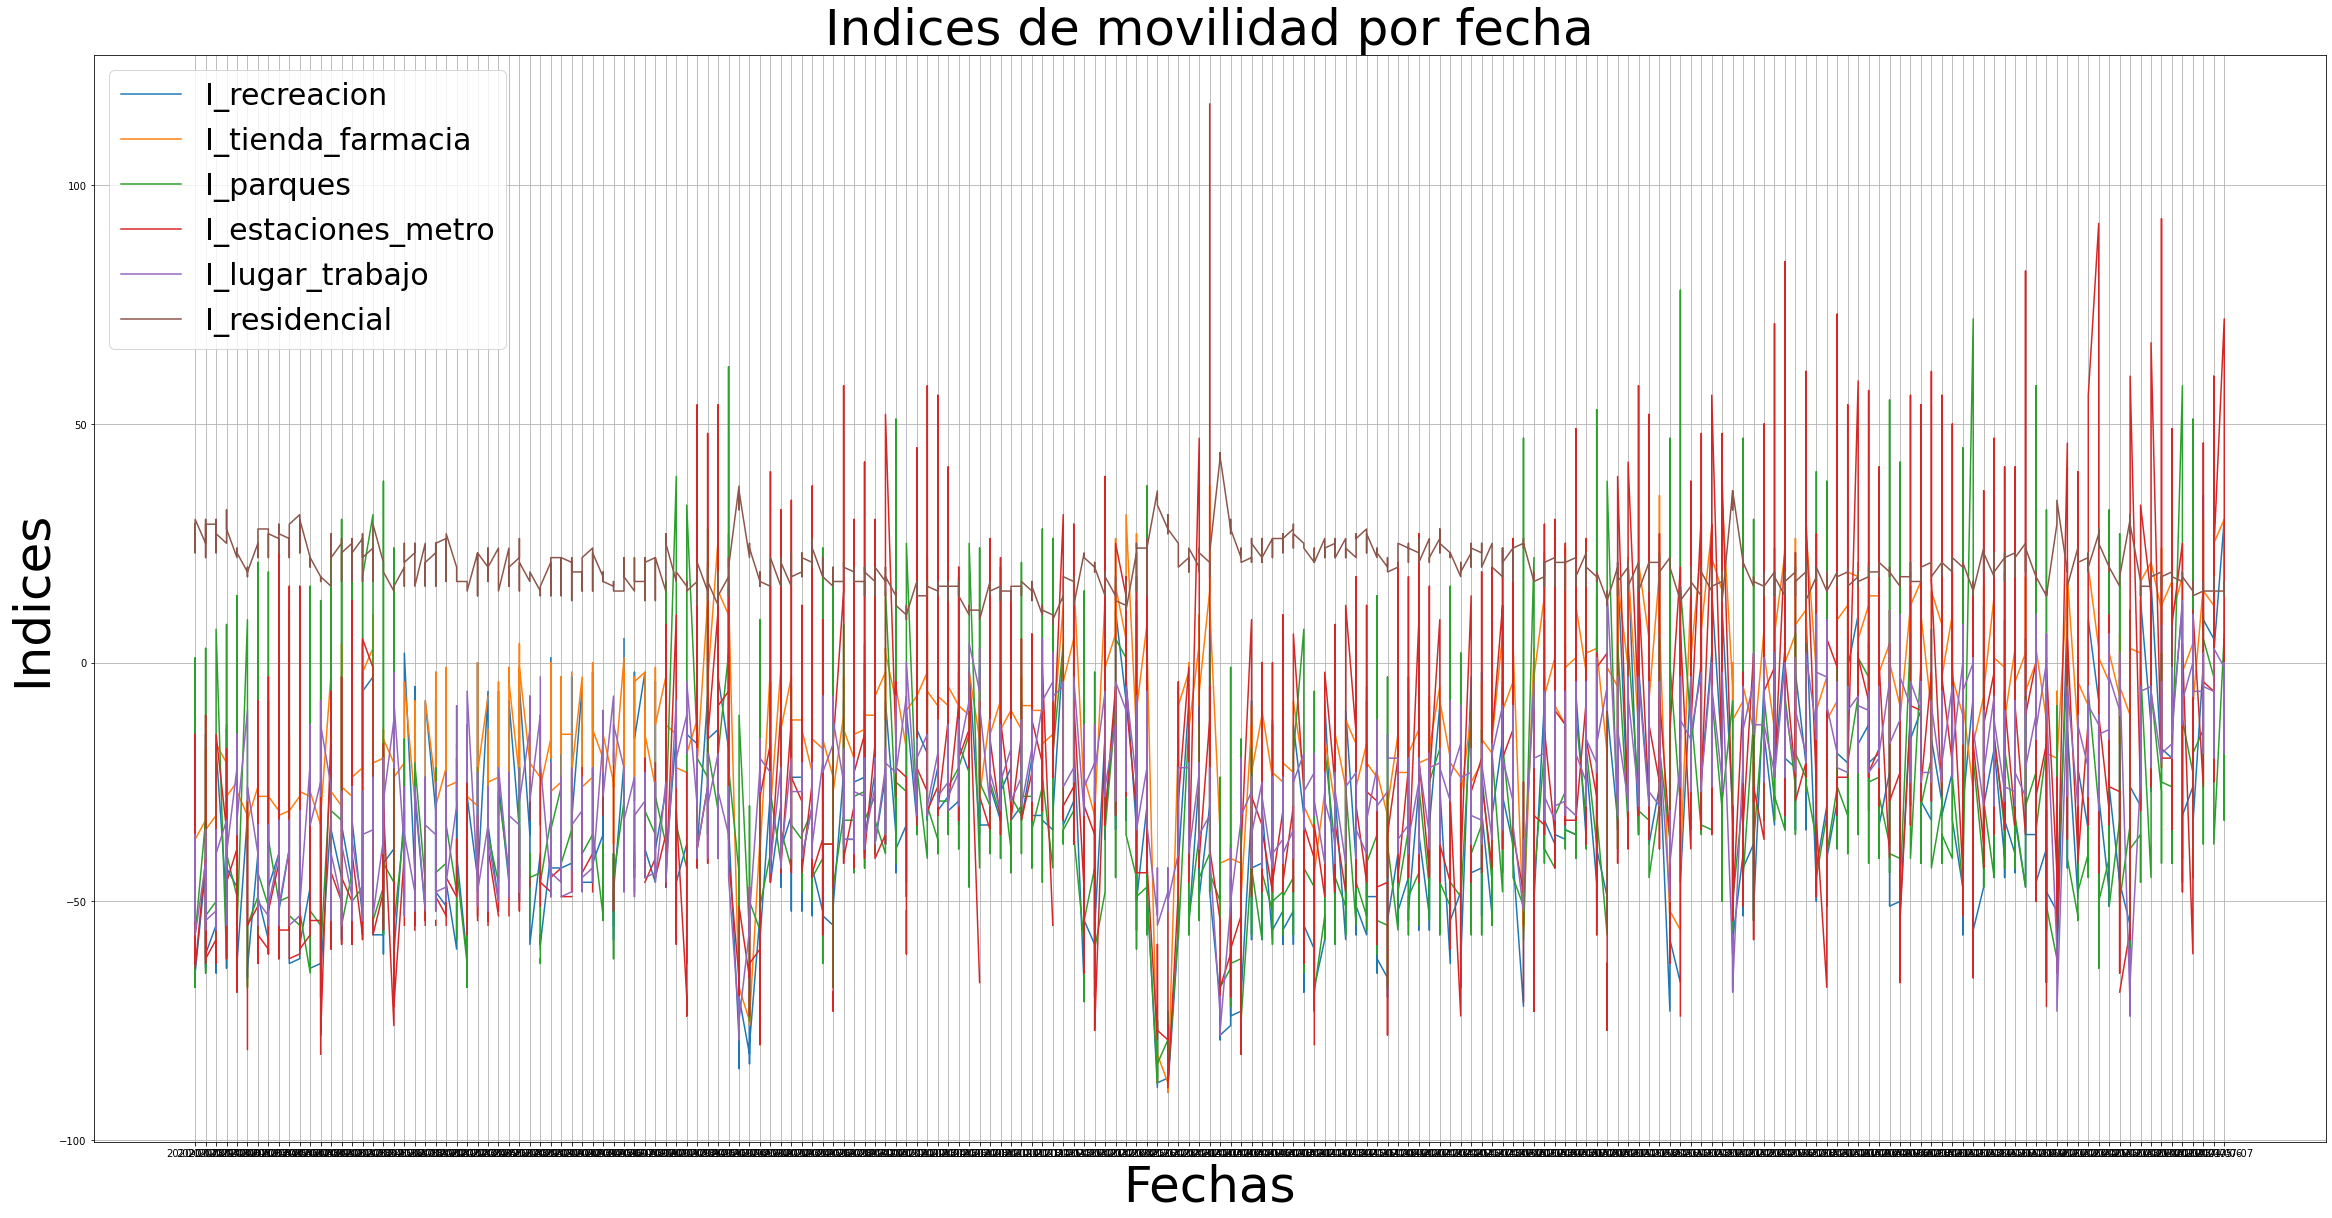

In [16]:
x=DF["Fecha"]
y1 = DF["I_recreacion"]
y2 = DF["I_tienda_farmacia"]
y3 = DF["I_parques"]
y4 = DF["I_estaciones_metro"]
y5 = DF["I_lugar_trabajo"]
y6 = DF["I_residencial"]

plt.figure(figsize=(40,20))
plt.plot(x,y1, label = 'I_recreacion')
plt.plot(x,y2, label = 'I_tienda_farmacia')
plt.plot(x,y3, label = 'I_parques')
plt.plot(x,y4, label = 'I_estaciones_metro')
plt.plot(x,y5, label = 'I_lugar_trabajo')
plt.plot(x,y6, label = 'I_residencial')


plt.xlabel("Fechas",fontsize=50)
plt.ylabel("Indices",fontsize=50)
plt.legend(fontsize=30)

plt.title('Indices de movilidad por fecha',fontsize=50)
plt.grid()
plt.show()

In [17]:
df_Apple = pd.read_csv("C:/Users/Kail/Downloads/applemobilitytrends-2021-12-09.csv", sep=',', low_memory = False)
df_Apple.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,152.35,151.20,141.39,163.52,172.67,162.12,156.23,150.23,171.58,159.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,181.32,224.26,210.36,215.39,214.93,156.72,191.94,208.66,244.65,203.88
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,93.26,100.08,104.56,135.03,146.15,91.97,97.89,128.10,98.74,115.38
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,94.21,99.95,103.63,125.52,123.87,71.43,102.94,122.42,84.15,114.29
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,128.27,130.51,135.67,143.79,113.66,121.15,124.25,128.52,138.88,146.07


In [18]:
df_A = df_Apple[df_Apple['region'] == 'Santiago']
df_A.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69,135.45
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57,131.39


In [19]:
dfA = df_A.copy()
dfA.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
791,city,Santiago,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,...,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69,135.45
792,city,Santiago,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,...,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57,131.39


In [22]:
dfA.drop('region', axis=1, inplace = True)
dfA.head()

,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
791,driving,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,101.96,105.49,107.92,120.69,98.55,...,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69,135.45
792,walking,Santiago de Chile,Santiago Metropolitan Region,Chile,100.0,104.69,106.20,105.99,105.57,69.28,...,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57,131.39


In [32]:
#dfA.drop(['alternative_name','sub-region','country'], axis=1, inplace = True)
dfA.head()

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05,2021-12-06,2021-12-07,2021-12-08,2021-12-09
791,driving,100.0,101.96,105.49,107.92,120.69,98.55,67.72,95.29,98.78,...,109.77,116.10,115.88,154.11,134.38,84.19,115.82,140.95,94.69,135.45
792,walking,100.0,104.69,106.20,105.99,105.57,69.28,43.79,94.13,95.19,...,106.98,115.78,111.88,137.30,109.89,62.87,115.53,132.06,80.57,131.39


In [34]:
Dat= dfA.melt(id_vars=['transportation_type'], var_name="Fecha", value_name="Indice") 
Dat.head()

,transportation_type,Fecha,Indice
0,driving,2020-01-13,100.00
1,walking,2020-01-13,100.00
2,driving,2020-01-14,101.96
3,walking,2020-01-14,104.69
4,driving,2020-01-15,105.49


In [36]:
Dat['Fecha'] = pd.to_datetime(Dat['Fecha'])
Manejando = Dat[Dat['transportation_type'] == 'driving']
Caminando = Dat[Dat['transportation_type'] == 'walking']

In [38]:
Manejando.head()

,transportation_type,Fecha,Indice
0,driving,2020-01-13,100.00
2,driving,2020-01-14,101.96
4,driving,2020-01-15,105.49
6,driving,2020-01-16,107.92
8,driving,2020-01-17,120.69


In [39]:
Caminando.head()

,transportation_type,Fecha,Indice
1,walking,2020-01-13,100.00
3,walking,2020-01-14,104.69
5,walking,2020-01-15,106.20
7,walking,2020-01-16,105.99
9,walking,2020-01-17,105.57


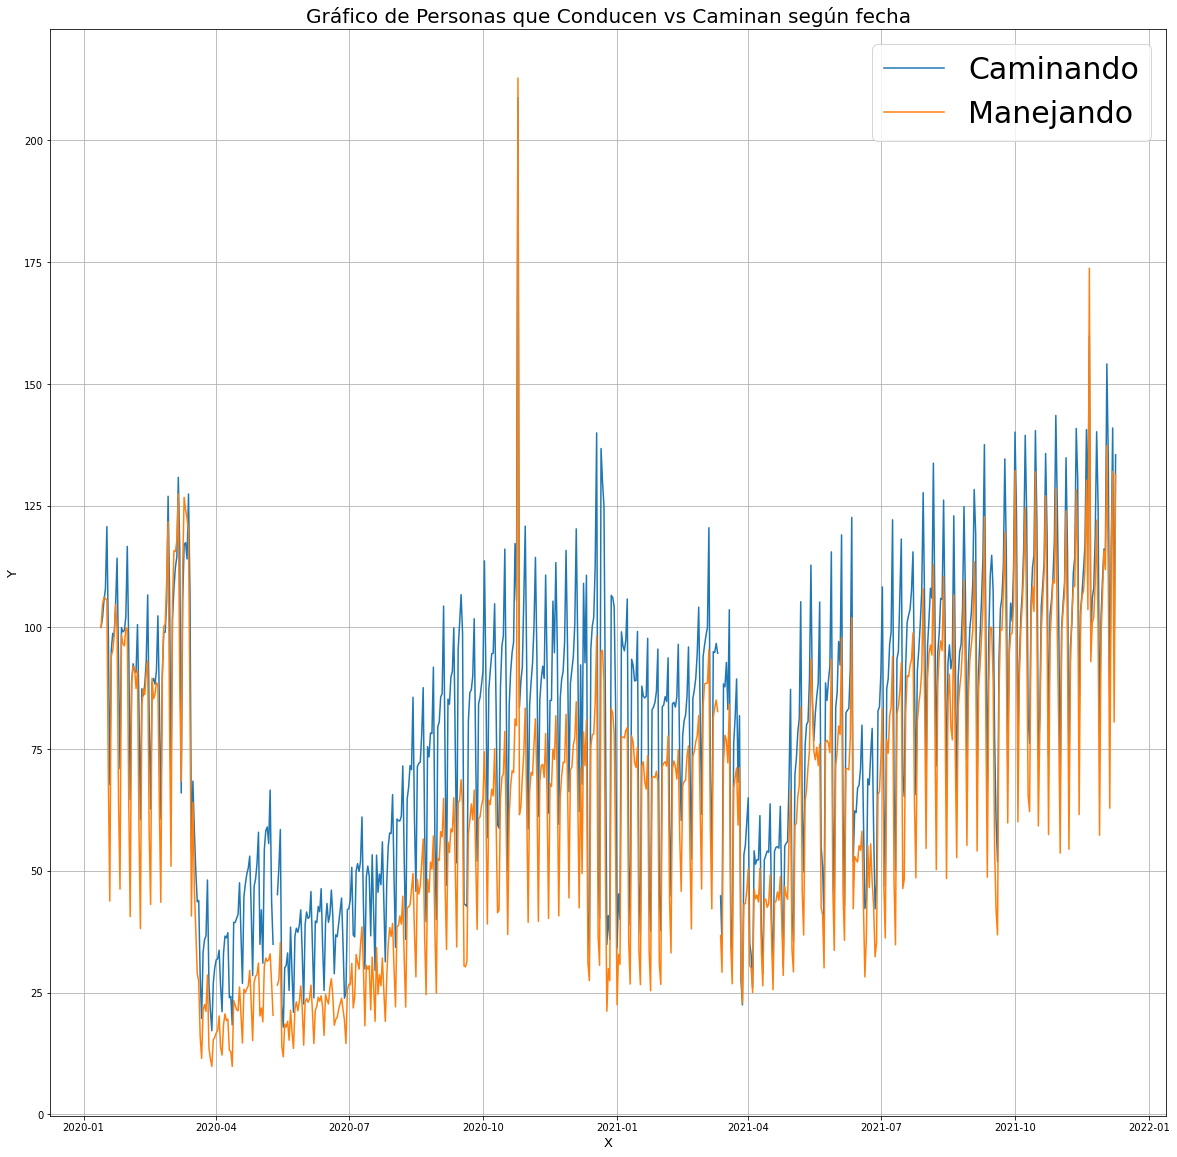

In [43]:
x=Manejando["Fecha"]
y1 = Manejando["Indice"]
y2 = Caminando["Indice"]
plt.figure(figsize=(20,20))
plt.plot(x,y1, label='Caminando')
plt.plot(x,y2, label = 'Manejando')


plt.xlabel("X",fontsize=13)
plt.ylabel("Y",fontsize=13)
plt.legend(fontsize=30)

plt.title('Gráfico de Personas que Conducen vs Caminan según fecha',fontsize=20)
plt.grid()
plt.show()